## Julia Michalska HW6




In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [41]:
columns = [
    'white-king-file', 'white-king-rank',
    'white-rook-file', 'white-rook-rank',
    'black-king-file', 'black-king-rank',
    'white-depth-of-win'
]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data'
df = pd.read_csv(url, names=columns)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw



zmiana pozycji figur a-h na wartości liczbowe + zmienna `white_depth_of_win` zmapowana do postaci numerycznej

In [42]:
file_map = {c: i+1 for i, c in enumerate('abcdefgh')}
for c in ['white-king-file','white-rook-file','black-king-file']:
    df[c] = df[c].map(file_map)

df['white-depth-of-win'] = (df['white-depth-of-win'].astype(str).str.strip().str.lower())

depth_map = {'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16}

df['white-depth-of-win'] = df['white-depth-of-win'].map(depth_map)

df[['white-depth-of-win']].head()

,white-depth-of-win
0,-1
1,-1
2,-1
3,-1
4,-1



odległość pomiędzy białym i czarnym królem w metryce euklidesowej, Manhattan i Czebyszewa + odległość czarnego króla od najbliższej krawędzi planszy

In [43]:
dx = df['white-king-file'] - df['black-king-file']
dy = df['white-king-rank'] - df['black-king-rank']

df['dist-euclidean'] = np.sqrt(dx**2 + dy**2)
df['dist-manhattan'] = np.abs(dx) + np.abs(dy)
df['dist-chebyshev'] = np.maximum(np.abs(dx), np.abs(dy))

df['black-king-dist-to-edge'] = np.minimum.reduce([df['black-king-file'] - 1, 8 - df['black-king-file'], df['black-king-rank'] - 1, 8 - df['black-king-rank']])

## Pytanie 1

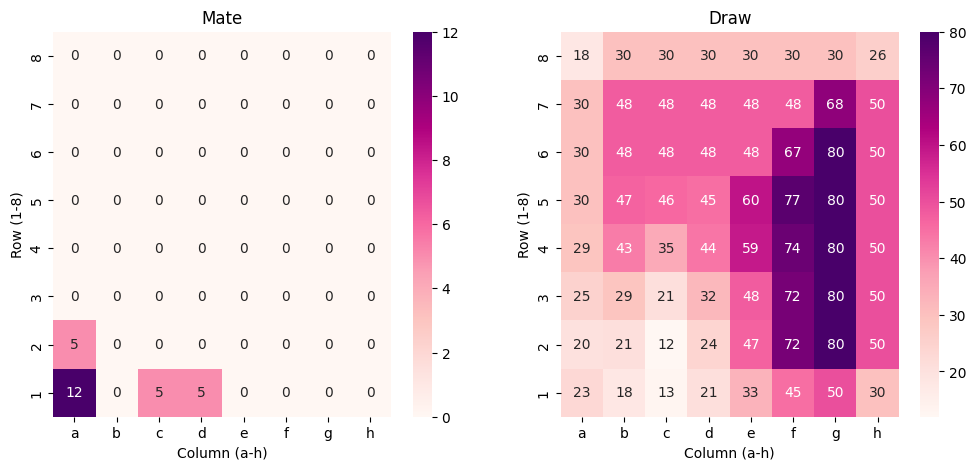

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

subset0 = df[df['white-depth-of-win'] == 0]

counts0 = pd.crosstab(subset0['black-king-rank'], subset0['black-king-file']).reindex(index=range(8, 0, -1), columns=range(1, 9), fill_value=0)

sns.heatmap(counts0, ax=axes[0], cmap='RdPu', annot=True, xticklabels=list('abcdefgh'), yticklabels=range(8, 0, -1))

axes[0].set_title('Mate')
axes[0].set_xlabel('Column (a-h)')
axes[0].set_ylabel('Row (1-8)')

subset1 = df[df['white-depth-of-win'] == -1]

counts1 = pd.crosstab(subset1['black-king-rank'], subset1['black-king-file']).reindex(index=range(8, 0, -1), columns=range(1, 9), fill_value=0)

sns.heatmap(counts1, ax=axes[1], cmap='RdPu', annot=True, xticklabels=list('abcdefgh'), yticklabels=range(8, 0, -1))

axes[1].set_title('Draw')
axes[1].set_xlabel('Column (a-h)')
axes[1].set_ylabel('Row (1-8)')

plt.show()


Na podstawie wizualizacji pozycji czarnego króla widać wyraźną różnicę pomiędzy pozycjami matowymi a remisowymi. 
W przypadku zakończenia gry matem (`white-depth-of-win = 0`) czarny król najczęściej znajduje się w pobliżu krawędzi planszy, a szczególnie w jej narożnikach. 
Natomiast w pozycjach remisowych (`white-depth-of-win = -1`) czarny król występuje częściej w centralnych obszarach planszy, z dala od krawędzi. Sugeruje to, że spychnięcie czarnego króla do krawędzi planszy będzie prowadziło do mata, a utrzymywanie go bliżej środka - do remisu.


## Pytanie 2

In [47]:
df2 = df.loc[df['white-depth-of-win'] != -1, ]
corr_matrix1 = df2[['dist-euclidean', 'dist-manhattan', 'dist-chebyshev', 'white-depth-of-win']].corr()['white-depth-of-win'].drop('white-depth-of-win')


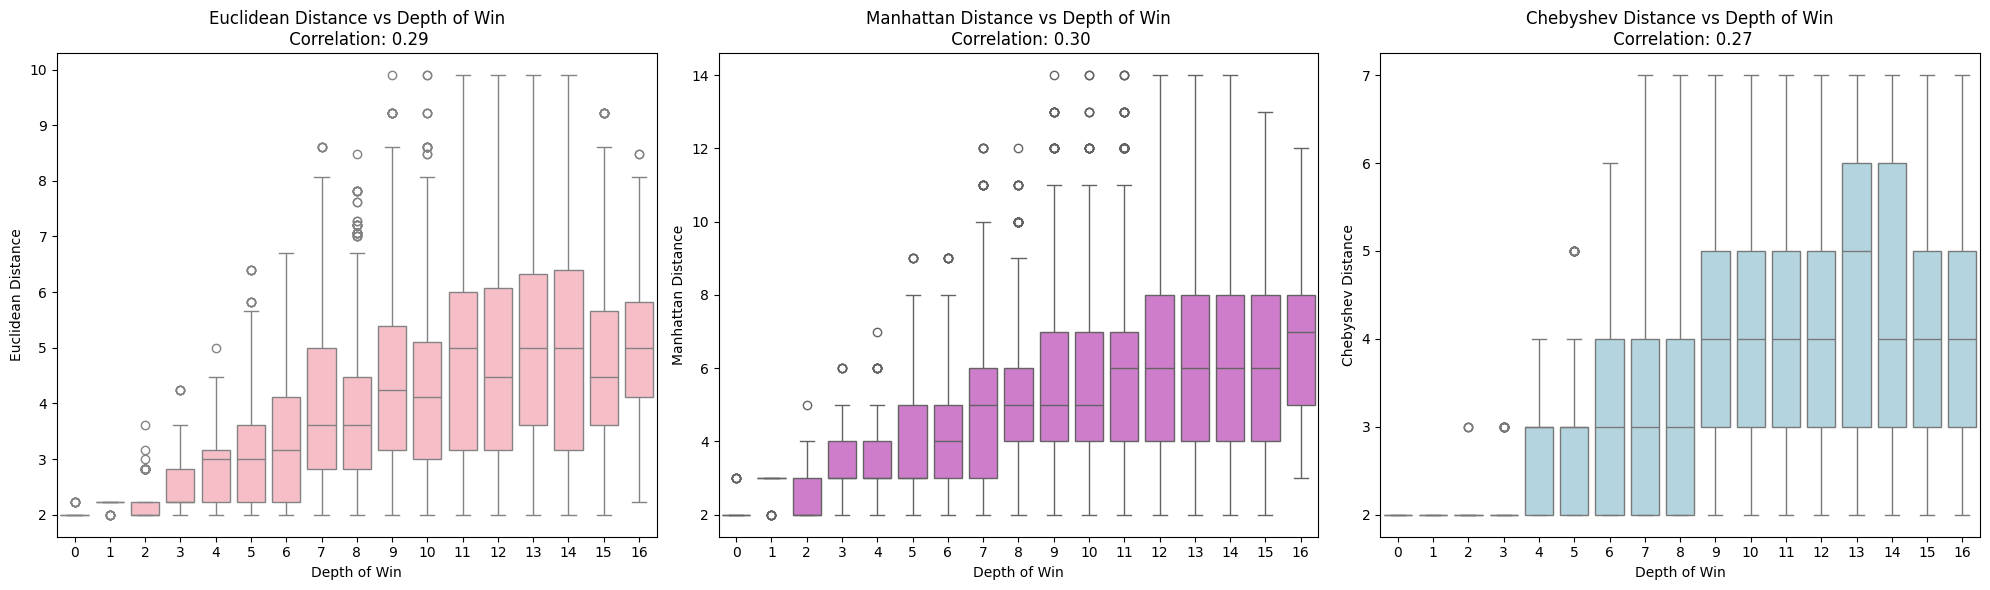

In [61]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='white-depth-of-win', y='dist-euclidean', data=df2, color='lightpink')
plt.title(f'Euclidean Distance vs Depth of Win\n Correlation: {corr_matrix1["dist-euclidean"]:.2f}')
plt.xlabel('Depth of Win')
plt.ylabel('Euclidean Distance')

plt.subplot(1, 3, 2)
sns.boxplot(x='white-depth-of-win', y='dist-manhattan', data=df2, color='orchid')
plt.title(f'Manhattan Distance vs Depth of Win\n Correlation: {corr_matrix1["dist-manhattan"]:.2f}')
plt.xlabel('Depth of Win')
plt.ylabel('Manhattan Distance')

plt.subplot(1, 3, 3)
sns.boxplot(x='white-depth-of-win', y='dist-chebyshev', data=df2, color='lightblue')
plt.title(f'Chebyshev Distance vs Depth of Win\n Correlation: {corr_matrix1["dist-chebyshev"]:.2f}')
plt.xlabel('Depth of Win')
plt.ylabel('Chebyshev Distance')

plt.tight_layout()
plt.show()


Porównując zależność pomiędzy liczbą ruchów do zakończenia gry a dystansem pomiędzy białym i czarnym królem w trzech metrykach, można zauważyć, że wszystkie metryki wykazują dodatnią zależność z `white_depth_of_win`. Jednak metryka Czebyszewa pokazuje najbardziej uporządkowaną strukturę rozkładów oraz najsilniejszą zależność pomiędzy dystansem a liczbą ruchów do mata. Wynika to z faktu, że metryka Czebyszewa najlepiej oddaje minimalną liczbę ruchów króla potrzebnych do zbliżenia się do przeciwnika, co przekłada się na bardziej precyzyjną estymację długości gry. W porównaniu z nią metryki euklidesowa i Manhattan charakteryzują się większym rozrzutem wartości.


## Pytanie 3

In [65]:
df_win = df[df['white-depth-of-win'] > 0]


C:\Users\48537\AppData\Local\Temp\ipykernel_32656\4112915280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


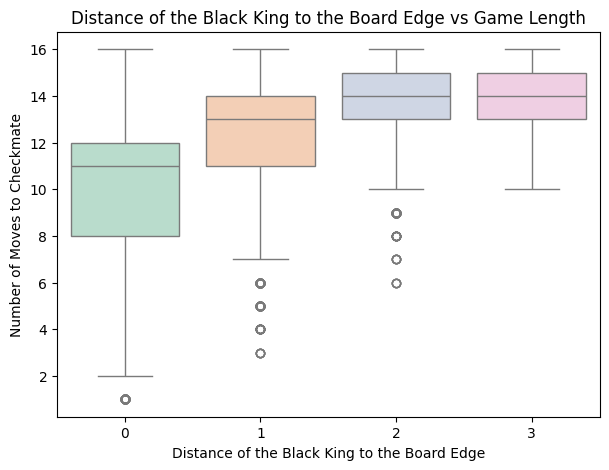

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(
    x='black-king-dist-to-edge',
    y='white-depth-of-win',
    data=df_win,
    palette='Pastel2'
)

plt.xlabel('Distance of the Black King to the Board Edge')
plt.ylabel('Number of Moves to Checkmate')
plt.title('Distance of the Black King to the Board Edge vs Game Length')
plt.show()


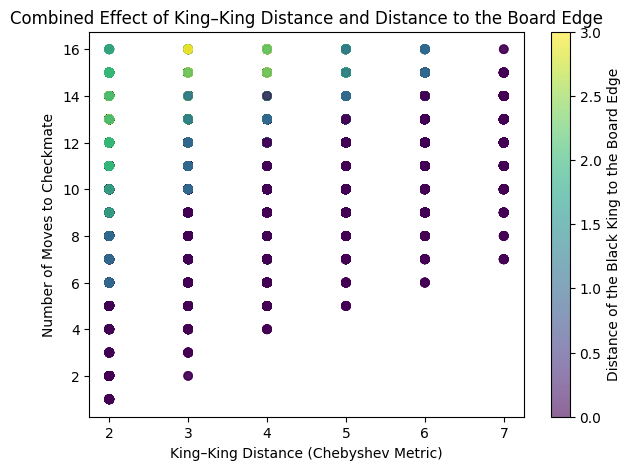

In [ ]:
plt.figure(figsize=(7, 5))
sc = plt.scatter(
    df_win['dist-chebyshev'],
    df_win['white-depth-of-win'],
    c=df_win['black-king-dist-to-edge'],
    cmap='viridis',
    alpha=0.6
)

plt.colorbar(sc, label='Distance of the Black King to the Board Edge')
plt.xlabel('King-King Distance (Chebyshev Metric)')
plt.ylabel('Number of Moves to Checkmate')
plt.title('Combined Effect of King-King Distance and Distance to the Board Edge')

plt.show()


Analiza zależności pomiędzy odległością czarnego króla od krawędzi planszy a liczbą ruchów do zakończenia gry pokazuje, że informacja ta jest użyteczna. 
Pozycje, w których czarny król znajduje się bliżej krawędzi planszy, zazwyczaj prowadzą do szybszego mata, natomiast większa odległość od krawędzi wiąże się z dłuższym czasem trwania gry. Dodatkowo, uwzględnienie jednocześnie dystansu pomiędzy białym i czarnym królem (metryka Czebyszewa) pozwala lepiej rozróżnić pozycje prowadzące do szybkiego i wolniejszego zakończenia gry. Wskazuje to, że połączenie obu informacji - położenia względem krawędzi oraz wzajemnego dystansu królów - dostarcza bardziej kompletnego opisu sytuacji na planszy niż każda z tych cech analizowana osobno.
